# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

-   Before you start
-   Install YOLOv8
-   CLI Basics
-   Inference with Pre-trained COCO Model
-   Roboflow Universe
-   Preparing a custom dataset
-   Custom Training
-   Validate Custom Model
-   Inference with Custom Model

**Let's begin!**


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.


In [ ]:
!python3


In [ ]:
!nvidia-smi

Sun May  7 15:48:26 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.61                 Driver Version: 531.61       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   70C    P8                4W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.93  Python-3.11.0 torch-2.0.0+cpu CPU
Setup complete  (8 CPUs, 15.8 GB RAM, 801.8/931.5 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.


In [15]:
model = YOLO('yolov8m-seg.pt')
results = model.predict(source='dog.jpeg', conf=0.25)


image 1/1 D:\pythonProjects\TextileProject\NoteBooks\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 3 backpacks, 617.4ms
Speed: 2.5ms preprocess, 617.4ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
results[0].boxes.xyxy

tensor([[7.1613e+01, 2.5060e+02, 6.4173e+02, 9.3539e+02],
        [6.2866e+02, 7.3475e+02, 6.9679e+02, 7.8779e+02],
        [9.7980e-01, 3.5747e+02, 5.7837e+02, 1.2756e+03],
        [0.0000e+00, 8.6742e+02, 4.4445e+02, 1.2792e+03],
        [0.0000e+00, 6.9136e+02, 4.4525e+02, 1.2800e+03],
        [0.0000e+00, 3.5686e+02, 4.8025e+02, 1.2791e+03]])

In [6]:
results[0].boxes.conf

tensor([0.8732, 0.5885, 0.5165, 0.3797, 0.3301, 0.3004])

In [7]:
results[0].boxes.cls

tensor([16.,  2.,  0., 24., 24., 24.])

In [8]:
results[0].masks.masks

WARNING  'Masks.masks' is deprecated. Use 'Masks.data' instead.


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Custom Training


In [24]:
# !yolo task=segment mode=train model=yolov8m-seg.pt data=./dataset/data.yaml epochs=10 imgsz=640
from ultralytics import YOLO


model = YOLO("yolov8m-seg.pt")

model.train(data="D:/pythonProjects/TextileProject/NoteBooks/dataset/data.yaml", epochs=10, imgsz=640) 
metrics = model.val()

Ultralytics YOLOv8.0.93  Python-3.11.0 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=D:/pythonProjects/TextileProject/NoteBooks/dataset/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

FileNotFoundError: D:\pythonProjects\TextileProject\NoteBooks\demo.png does not exist

In [26]:
success = model.export()

Ultralytics YOLOv8.0.93  Python-3.11.0 torch-2.0.0+cpu CPU

PyTorch: starting from runs\segment\train22\weights\best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (52.3 MB)

TorchScript: starting export with torch 2.0.0+cpu...
TorchScript: export success  10.6s, saved as runs\segment\train22\weights\best.torchscript (104.4 MB)

Export complete (14.8s)
Results saved to D:\pythonProjects\TextileProject\NoteBooks\runs\segment\train22\weights
Predict:         yolo predict task=segment model=runs\segment\train22\weights\best.torchscript imgsz=640 
Validate:        yolo val task=segment model=runs\segment\train22\weights\best.torchscript imgsz=640 data=D:/pythonProjects/TextileProject/NoteBooks/dataset/data.yaml 
Visualize:       https://netron.app


In [27]:
results = model("demo.png")


image 1/1 D:\pythonProjects\TextileProject\NoteBooks\demo.png: 384x640 7 Waters, 2897.4ms
Speed: 2.0ms preprocess, 2897.4ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


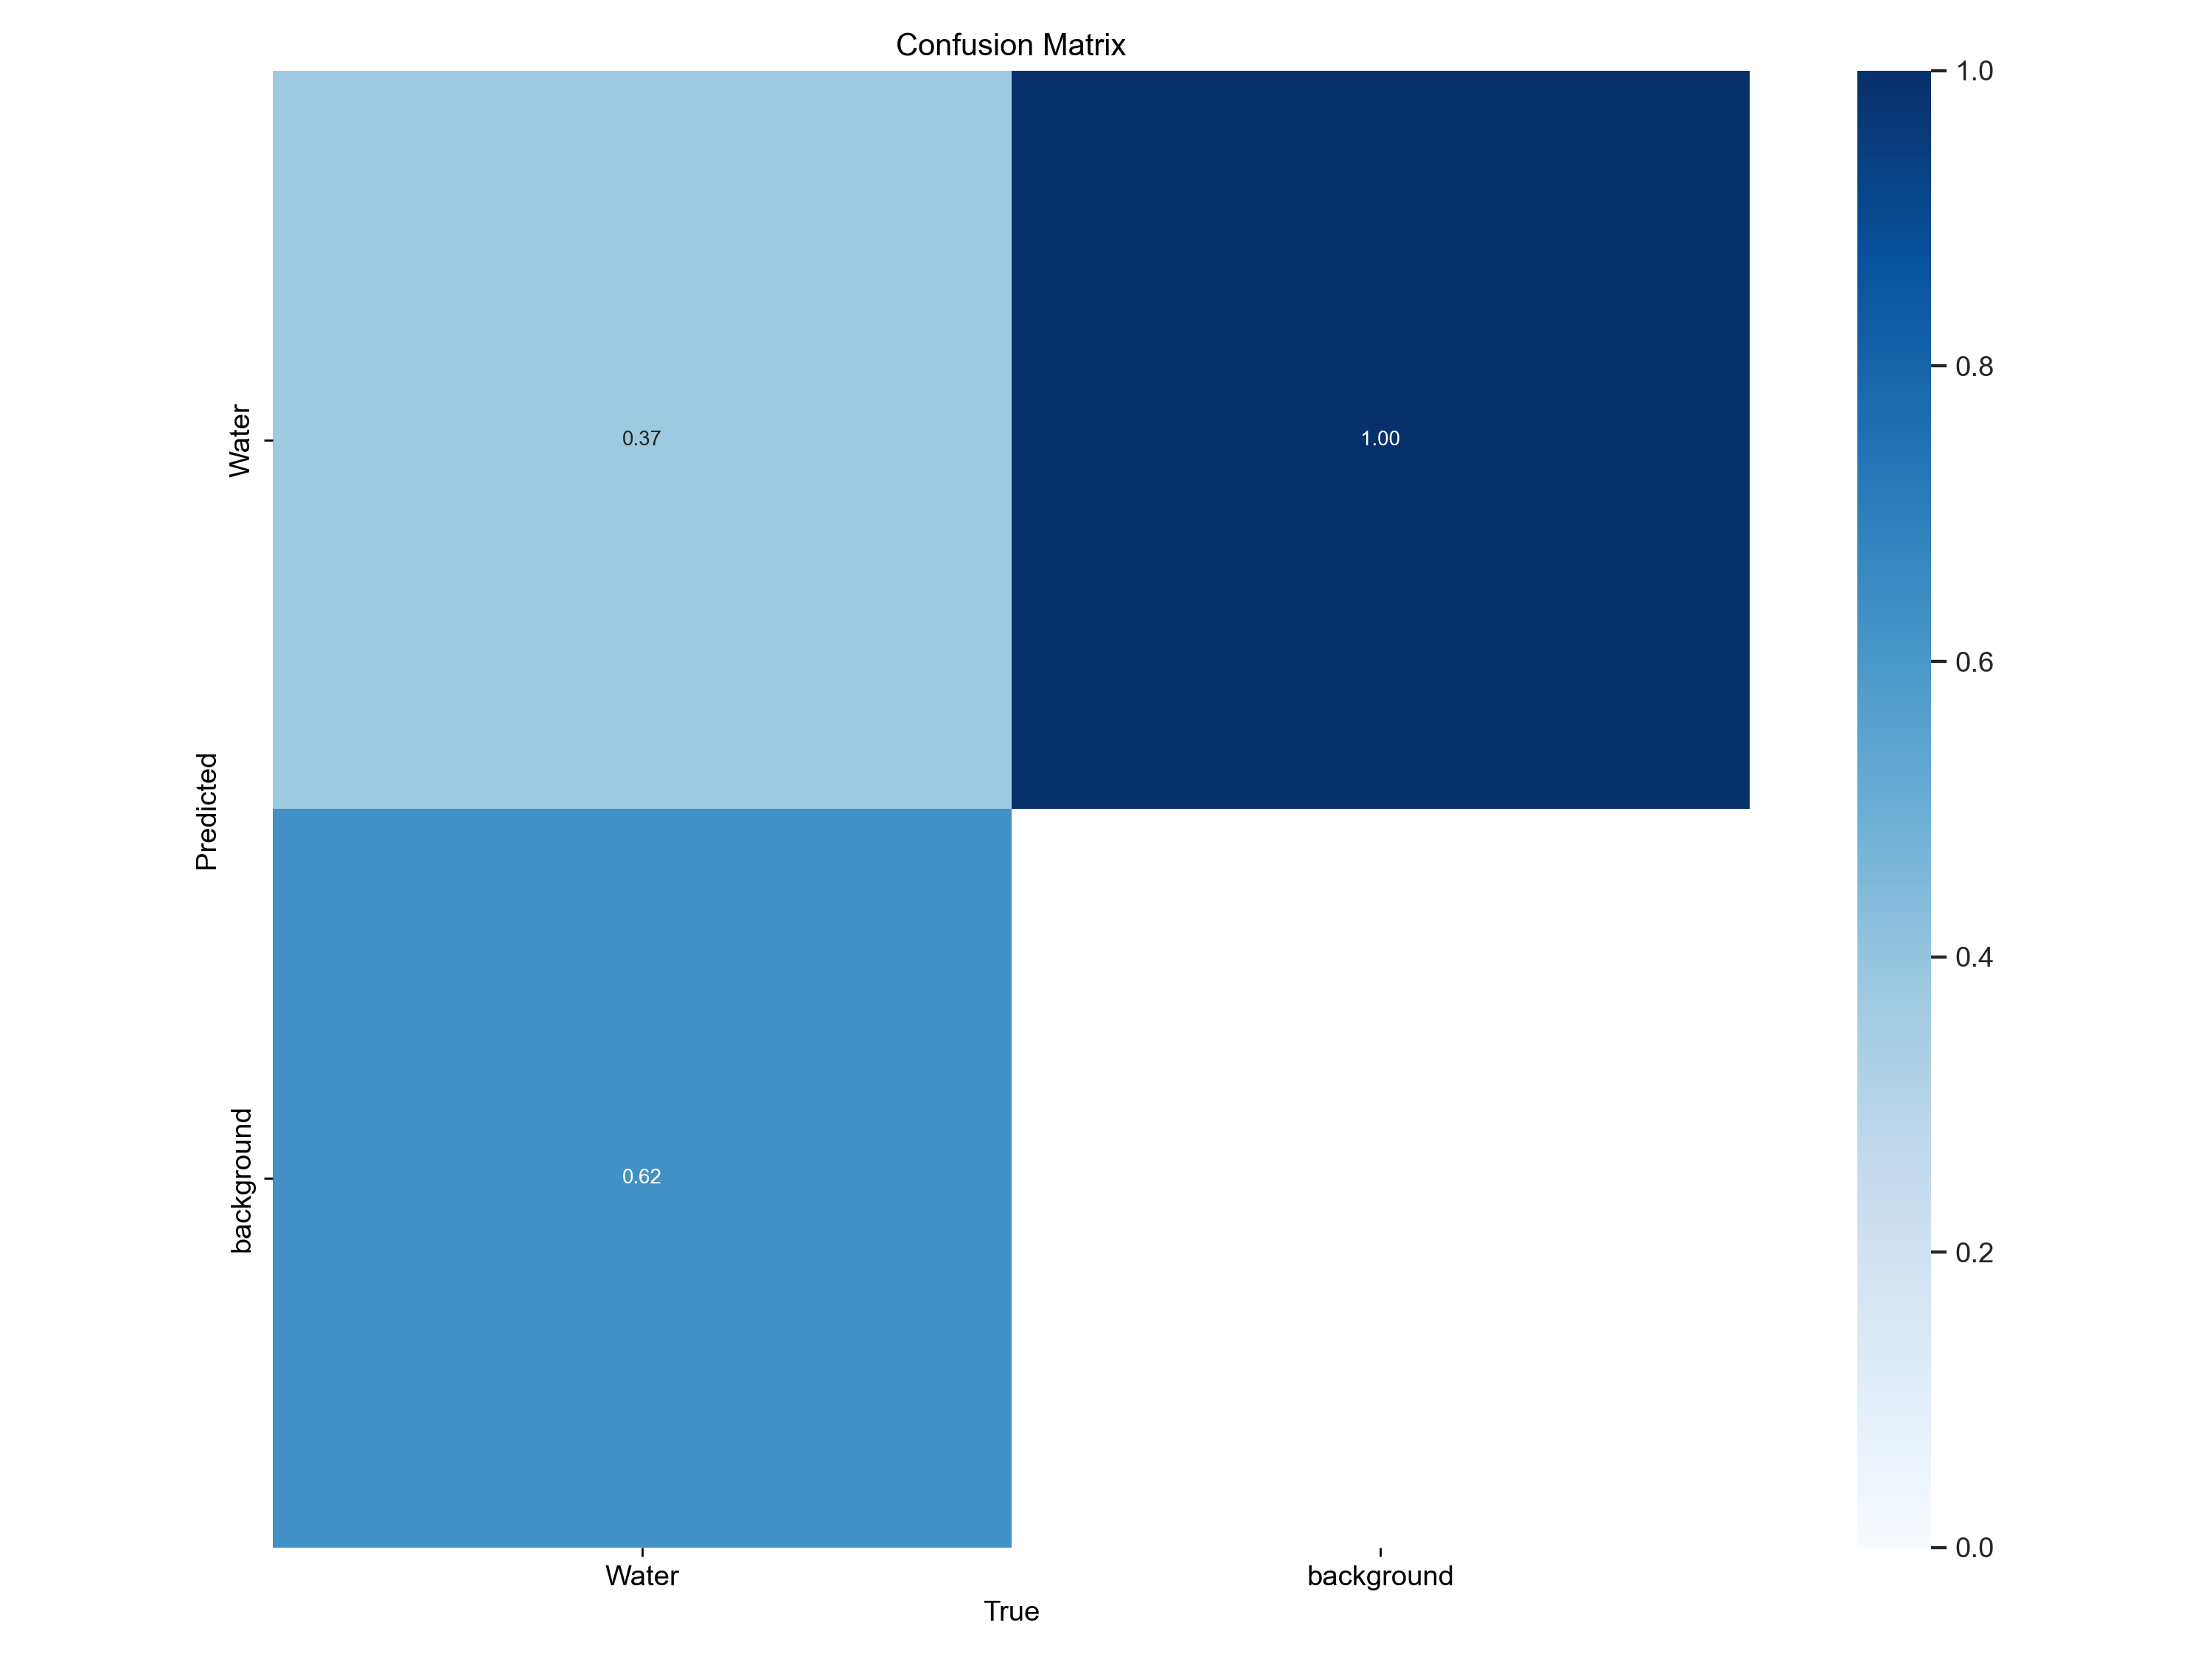

In [32]:
from IPython.display import Image
Image(filename='runs/segment/train22/confusion_matrix.png', width=600)

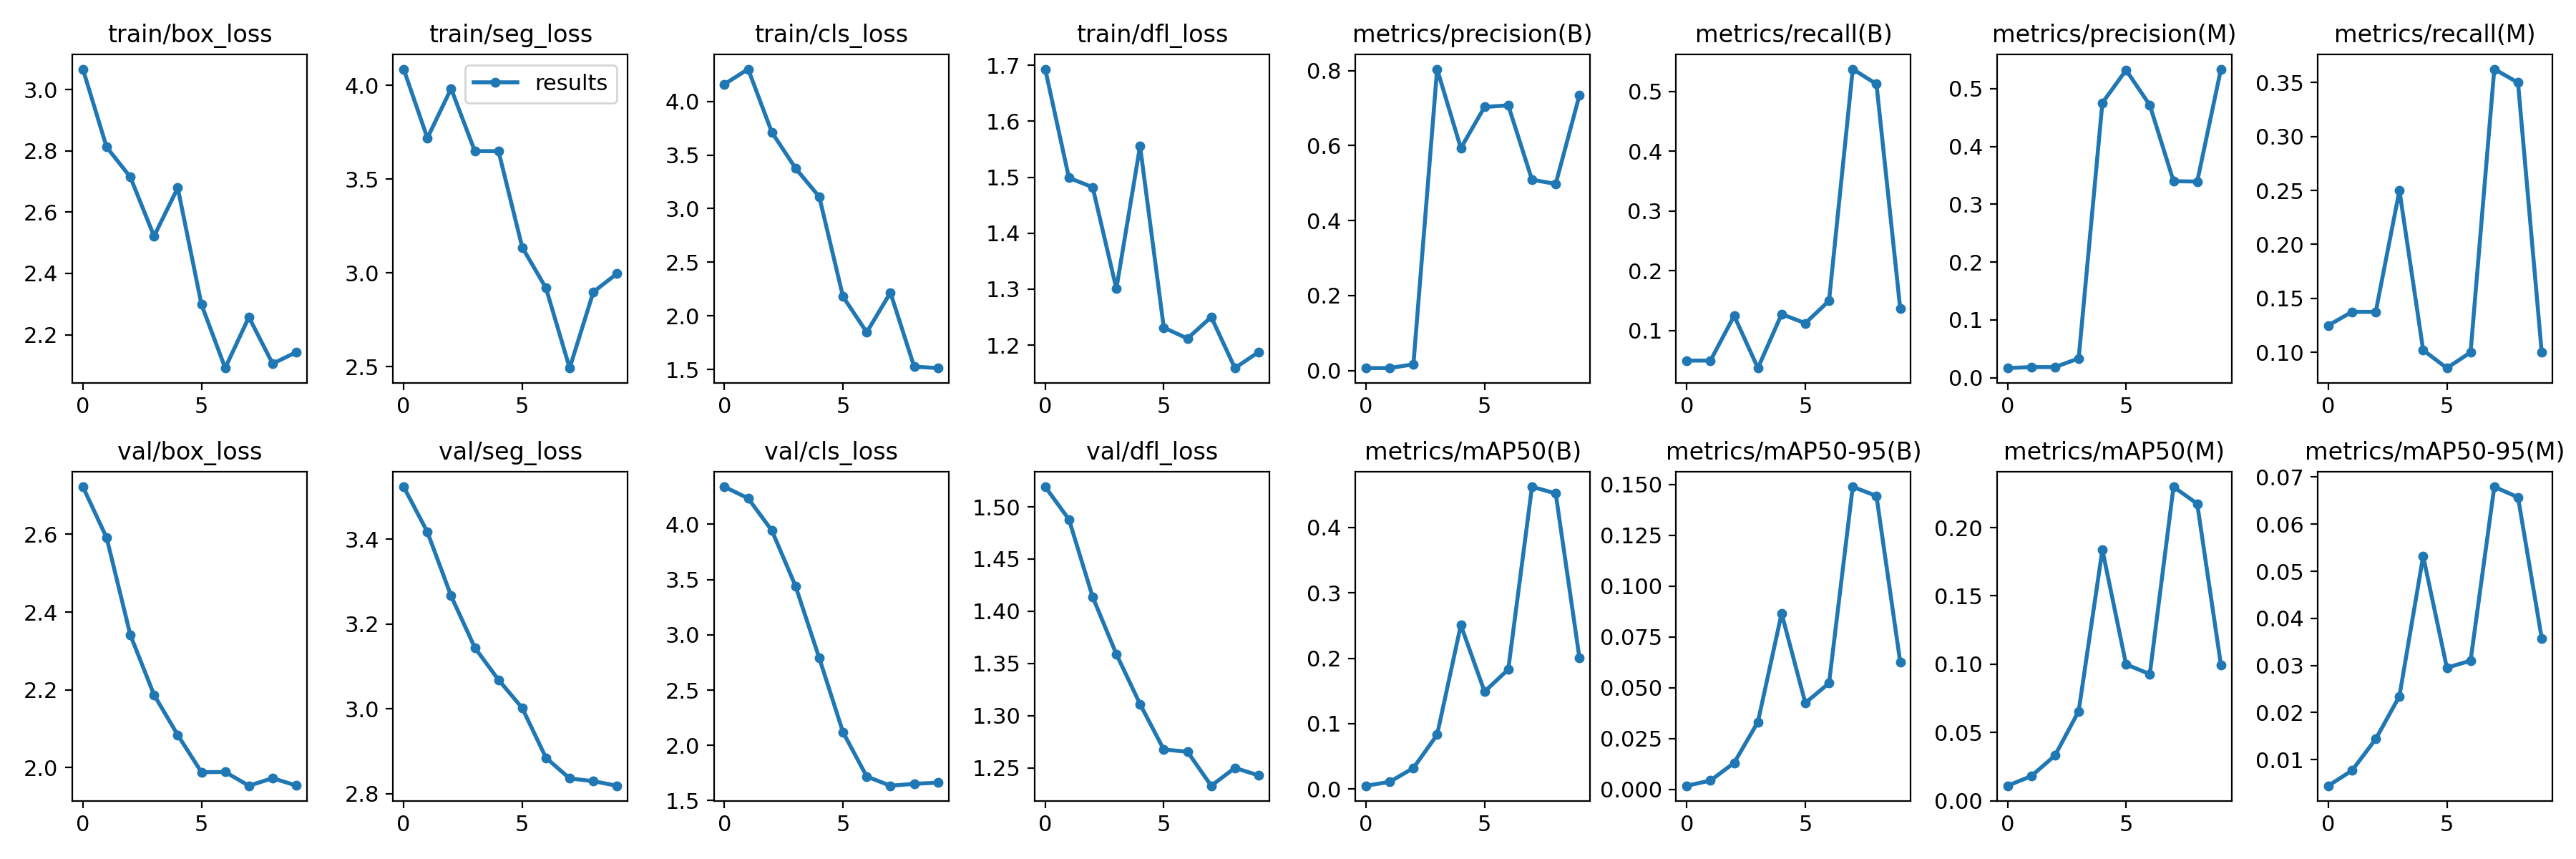

In [33]:
Image(filename='runs/segment/train22/results.png', width=600)

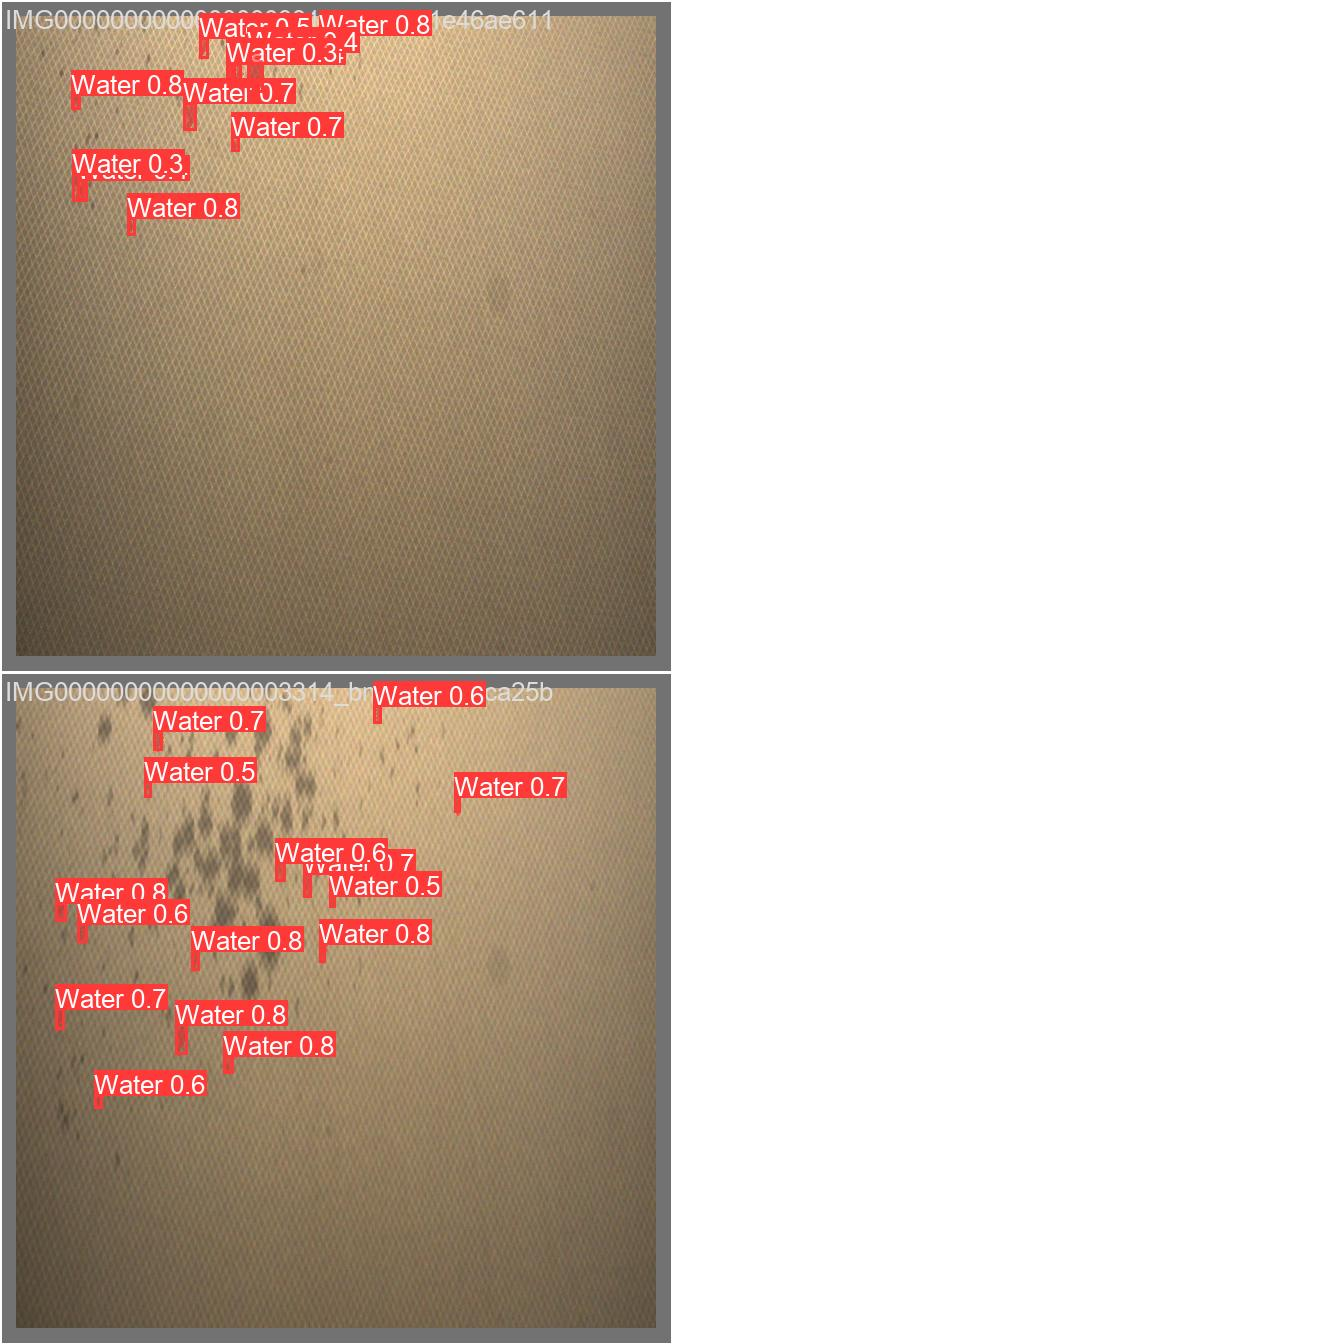

In [35]:
Image(filename='runs/segment/val/val_batch0_pred.jpg', width=600)

## Validate Custom Model


In [36]:
!yolo task=segment mode=val model=/runs/segment/train22/weights/best.pt data=datase/data.yaml

'yolo' is not recognized as an internal or external command,
operable program or batch file.


## Inference with Custom Model


In [ ]:
!yolo task=segment mode=predict model=/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

image 1/138 /content/datasets/R2P2-2/test/images/IMG_1099_rotated90_jpg.rf.1553442b78974376f116a58b866afd3e.jpg: 640x640 1 rice, 22.0ms
image 2/138 /content/datasets/R2P2-2/test/images/IMG_1107_jpg.rf.981bfabc920e7dc1945b4d8de649f145.jpg: 640x640 1 rice, 22.0ms
image 3/138 /content/datasets/R2P2-2/test/images/IMG_1110_rotated90_jpg.rf.eca496158606f468a0fba2f343148060.jpg: 640x640 1 rice, 22.1ms
image 4/138 /content/datasets/R2P2-2/test/images/IMG_1111_jpg.rf.fe64c08531cc46e68e4d70cb09c62bef.jpg: 640x640 1 rice, 22.0ms
image 5/138 /content/datasets/R2P2-2/test/images/IMG_1114_rotated180_jpg.rf.e097cda00b1541c1f416cf14343601b8.jpg: 640x640 1 rice, 22.1ms
image 6/138 /content/datasets/R2P2-2/test/images/IMG_1121_rotated90_jpg.rf.3f2540683c388ebcc622637e55cc27f3.jpg: 640x640 1 jam, 22.1ms
image 7/138 /content